/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_1.csv
/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_2.csv
/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_3.csv


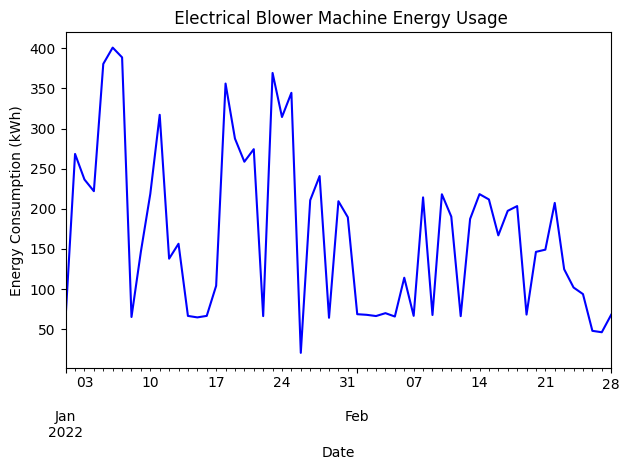

In [1]:
# Imports
import matplotlib.pyplot as plt # plotting
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

holder = []
# kaggle notebook specific
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname,filename)
        print(filepath)
        holder.append(
            pd.read_csv(
                filepath,
                names=['id','date','time','consumption'],
                index_col='id',
                header=0,
            )
        )
# Combines the files
df = pd.concat(holder,ignore_index=True)
# Change the date to a readable format, then sort it
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.sort_values('date')

# Sifts the dataset into date | total consumption that day, then plots it
df.groupby(df['date'])['consumption'].sum().plot(x='date', y='consumption', color='blue', linestyle='-')

# Labeling
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title(' Electrical Blower Machine Energy Usage')
plt.tight_layout()